## Wavelet data generation..

In [56]:
import os
import librosa
import matplotlib.pyplot as plt

def func(cls):
# Define paths
  base_dir = '/Users/harshitsharma/MLT_PROJECT/'
  genres_dir = os.path.join(base_dir, 'genres', cls)
  train_dir = os.path.join(base_dir, 'wavelets', 'train', cls)
  test_dir = os.path.join(base_dir, 'wavelets', 'test', cls)
  # Ensure directories exist
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)
  print(cls)
  # Get list of audio files
  img_names = os.listdir(genres_dir)  
  train_names = img_names[:60]
  test_names = img_names[60:]
  # Process train set
  for i, nm in enumerate(train_names, start=1):
    x, sr = librosa.load(os.path.join(genres_dir, nm))
    plt.figure(figsize=(14, 5))
    plt.plot(x)
    plt.savefig(os.path.join(train_dir, f'{i}.png'))
    plt.close()
  # Process test set
  for i, nm in enumerate(test_names, start=1):
    x, sr = librosa.load(os.path.join(genres_dir, nm))
    plt.figure(figsize=(14, 5))
    plt.plot(x)
    plt.savefig(os.path.join(test_dir, f'{i}.png'))
    plt.close()


In [23]:
func('blues')

blues


In [24]:
func('classical')

classical


In [25]:
func('country')

country


In [26]:
func('disco')

disco


In [27]:
func('hiphop')

hiphop


In [31]:
func('jazz')

jazz


In [32]:
func('metal')

metal


In [33]:
func('pop')

pop


In [34]:
func('reggae')

reggae


In [35]:
func('rock')

rock


In [36]:
import os
classes = [a for a in os.listdir('genres') if '.' not in a]
print(classes)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


## Spectrogram generation..

In [37]:
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display

def func1(cls):
  base_dir = '/Users/harshitsharma/MLT_PROJECT/'
  genres_dir = os.path.join(base_dir, 'genres', cls)
  train_dir = os.path.join(base_dir, 'spectrogram', 'train', cls)
  test_dir = os.path.join(base_dir, 'spectrogram', 'test', cls)
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)
  print(cls)
  img_names = os.listdir(genres_dir)
  train_names = img_names[:60]
  test_names = img_names[60:]
  for i, nm in enumerate(train_names, start=1):
    x, sr = librosa.load(os.path.join(genres_dir, nm))
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig(os.path.join(train_dir, f'{i}.png'))
    plt.close()
  for i, nm in enumerate(test_names, start=1):
    x, sr = librosa.load(os.path.join(genres_dir, nm))
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig(os.path.join(test_dir, f'{i}.png'))
    plt.close()

In [39]:
func1('blues')

blues


In [40]:
func1('classical')

classical


In [41]:
func1('country')

country


In [42]:
func1('disco')

disco


In [43]:
func1('hiphop')

hiphop


In [44]:
func1('jazz')

jazz


In [45]:
func1('metal')

metal


In [46]:
func1('pop')

pop


In [47]:
func1('reggae')

reggae


In [48]:
func1('rock')

rock


In [49]:
import os
classes = [a for a in os.listdir('genres') if '.' not in a]
print(classes)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


## Model training..

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix



import cv2
import os

import numpy as np
import os

In [70]:
labels = ['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
img_size = 256

def resize_image(img_path):
    try:
        img = Image.open(img_path)
        img = img.convert('RGB')
        img = img.resize((img_size, img_size))
        img_arr = np.array(img)
        img_arr = np.expand_dims(img_arr, axis=0)  # Ensure the image array has a consistent shape
        return img_arr
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return None

def get_data(data_dir):
    img_data = [] 
    class_labels = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_arr = resize_image(os.path.join(path, img))
            if img_arr is not None:
                img_data.append(img_arr)
                class_labels.append(class_num)
    img_data_array = np.array(img_data)
    class_labels_array = np.array(class_labels)
    return img_data_array, class_labels_array

In [71]:
train_data, train_labels = get_data('spectrogram/train')
val_data, val_labels = get_data('spectrogram/test')

In [72]:
x_train = train_data / 255.0
x_val = val_data / 255.0

# Reshape the data
x_train = x_train.reshape(-1, img_size, img_size, 3)  # assuming RGB images
y_train = train_labels.reshape(-1, 1)

x_val = x_val.reshape(-1, img_size, img_size, 3)  # assuming RGB images
y_val = val_labels.reshape(-1, 1)

In [77]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [78]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,418,666 (32.11 MB)

 Trainable params: 8,418,666 (32.11 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [80]:
history = model.fit(x_train,y_train,epochs = 200, validation_data = (x_val, y_val))

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1130 - loss: 2.3227 - val_accuracy: 0.2125 - val_loss: 2.2100
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2479 - loss: 2.1677 - val_accuracy: 0.2600 - val_loss: 2.0257
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2848 - loss: 1.9734 - val_accuracy: 0.3450 - val_loss: 1.8703
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3373 - loss: 1.8367 - val_accuracy: 0.2900 - val_loss: 1.7852
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3222 - loss: 1.7693 - val_accuracy: 0.3200 - val_loss: 1.7593
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3384 - loss: 1.7367 - val_accuracy: 0.3225 - val_loss: 1.7410
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3444 - loss: 1.7464 - val_accuracy: 0.3575 - val_loss: 1.6937
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3865 - loss: 1.6260 - val_accuracy: 0.3850 - v

In [83]:
import pickle
model.save_weights('500_epoch_simple_lr.weights.h5')

pickle.dump(history.history, open('history_200_epoch_simple.pkl','wb'))

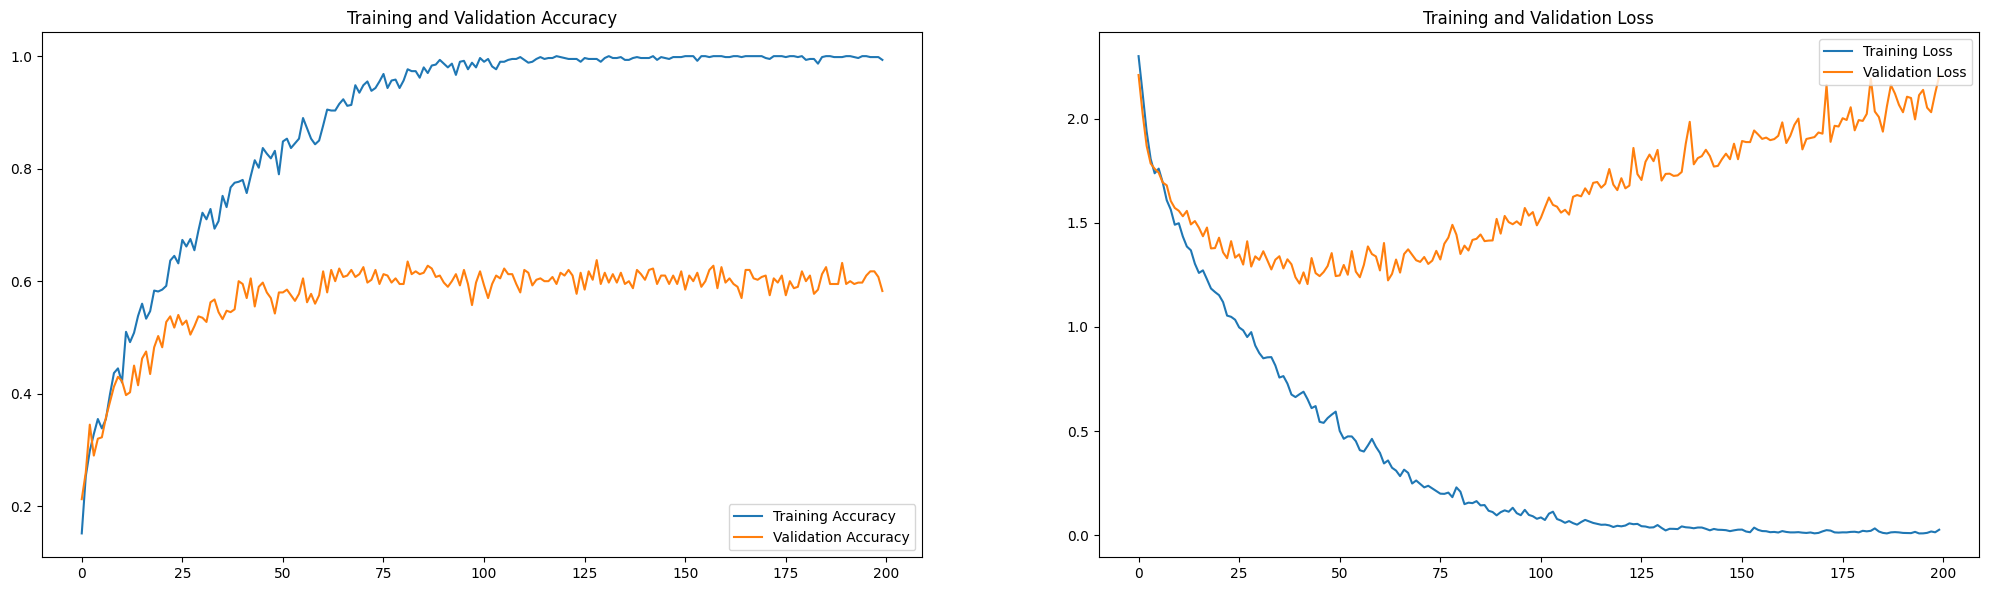

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
import pickle
history = pickle.load(open('history_200_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(200)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10) # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('sim_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1500x600 with 0 Axes>

In [87]:
predictions_probs = model.predict(x_val)
predictions = np.argmax(predictions_probs, axis=1)
print(classification_report(y_val, predictions, target_names=labels))

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step
              precision    recall  f1-score   support

         pop       0.55      0.68      0.61        40
       metal       0.77      0.82      0.80        40
       disco       0.68      0.33      0.44        40
       blues       0.49      0.68      0.57        40
      reggae       0.53      0.62      0.57        40
   classical       0.87      0.85      0.86        40
        rock       0.30      0.50      0.37        40
      hiphop       0.68      0.47      0.56        40
     country       0.48      0.25      0.33        40
        jazz       0.78      0.62      0.69        40

    accuracy                           0.58       400
   macro avg       0.61      0.58      0.58       400
weighted avg       0.61      0.58      0.58       400



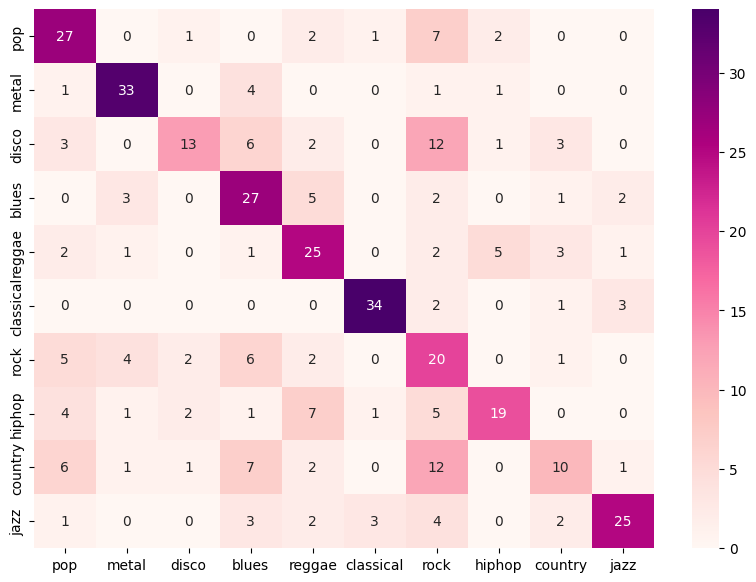

In [88]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png',bbox_inches = 'tight')

# Transfer Learning based modeling

In [89]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")

/var/folders/l9/jslqp2nd64zg_b8ssq037_r40000gn/T/ipykernel_31126/3284812586.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")


In [90]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10, activation="softmax")                                     
                                ])

In [93]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

history1 = model.fit(x_train,y_train,epochs = 200 , validation_data = (x_val, y_val))


Epoch 1/200


/Users/harshitsharma/MLT_PROJECT/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1314 - loss: 2.4358 - val_accuracy: 0.1925 - val_loss: 2.2938
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1458 - loss: 2.3440 - val_accuracy: 0.2250 - val_loss: 2.2182
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1938 - loss: 2.2450 - val_accuracy: 0.2525 - val_loss: 2.1635
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2069 - loss: 2.2331 - val_accuracy: 0.2800 - val_loss: 2.1153
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2494 - loss: 2.1357 - val_accuracy: 0.3025 - val_loss: 2.0714
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2432 - loss: 2.1586 - val_accuracy: 0.3150 - val_loss: 2.0317
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2322 - loss: 2.0849 - val_accuracy: 0.3250 - val_loss: 1.9941
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2805 - loss: 2.0554 - val_accuracy: 0.3450 - val_loss: 1.9

In [96]:
with open('history_200_epoch_tr.pkl', 'wb') as file:
  pickle.dump(history1.history, file)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,296,416 (8.76 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 25,622 (100.09 KB)

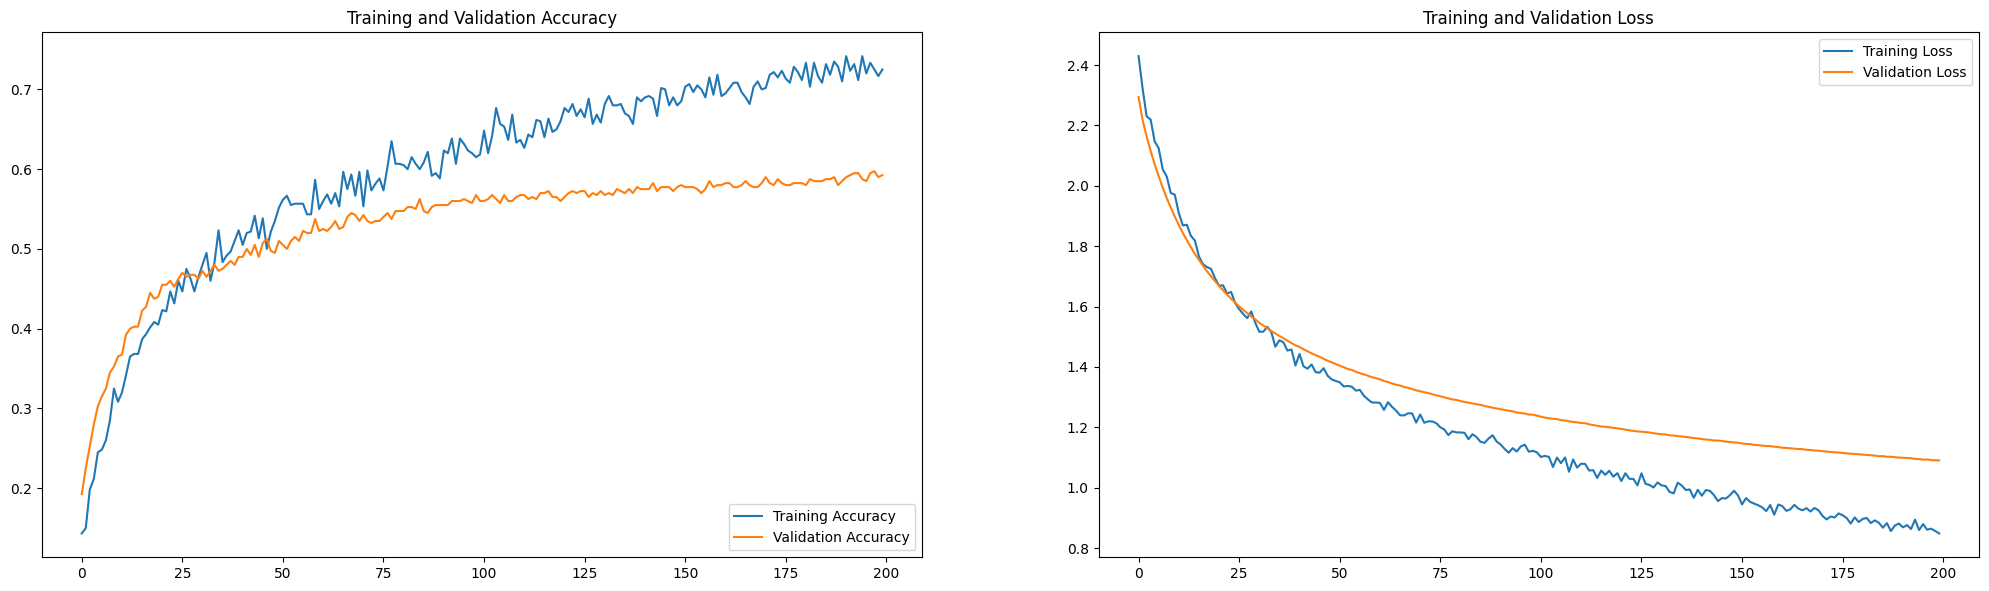

In [98]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [99]:
import pickle
history = pickle.load(open('history_200_epoch_tr.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(200)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10) # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('tfr_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1500x600 with 0 Axes>

In [100]:
predictions_probs = model.predict(x_val)
predictions = np.argmax(predictions_probs, axis=1)
print(classification_report(y_val, predictions, target_names=labels))

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 756ms/step
              precision    recall  f1-score   support

         pop       0.62      0.70      0.66        40
       metal       0.72      0.82      0.77        40
       disco       0.42      0.42      0.42        40
       blues       0.51      0.53      0.52        40
      reggae       0.55      0.53      0.54        40
   classical       0.86      0.95      0.90        40
        rock       0.38      0.23      0.28        40
      hiphop       0.50      0.57      0.53        40
     country       0.49      0.50      0.49        40
        jazz       0.77      0.68      0.72        40

    accuracy                           0.59       400
   macro avg       0.58      0.59      0.58       400
weighted avg       0.58      0.59      0.58       400



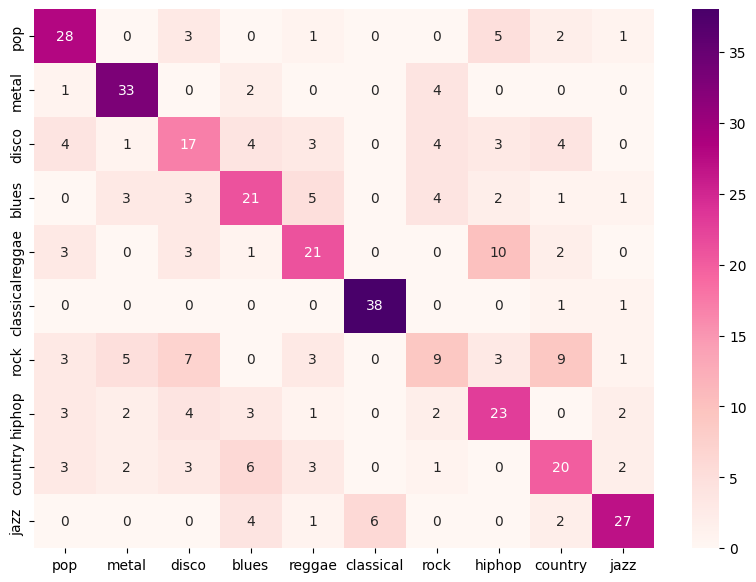

In [101]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

In [103]:
model.save_weights('200_epoch_transfer_lr.weights.h5')
pickle.dump(history1.history, open('history_200_epoch_tr.pkl','wb'))


In [104]:
epochs_range = range(200)
import matplotlib.pyplot as plt
import pickle 
history = pickle.load(open('history_200_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

history1 = pickle.load(open('history_200_epoch_tr.pkl','rb'))
acc1 = history1['accuracy']
val_acc1 = history1['val_accuracy']
loss1 = history1['loss']
val_loss1 = history1['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10) # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='CNN Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='CNN Validation Accuracy', c='red', linewidth=4)
ax1.plot(epochs_range, acc1, label='Transfer learning Training Accuracy', c = '#e72866', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Transfer learning Validation Accuracy', c='#282ec7', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='CNN Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='CNN Validation Loss', c='red', linewidth=4)
ax2.plot(epochs_range, loss1, label='Transfer learning Training Loss',c = '#c72866', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Transfer learning Validation Loss', c='#282ec7', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('all_1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1500x600 with 0 Axes>